In [15]:
import sys
read = sys.stdin.buffer.read
import time
from heapq import heappop, heappush
import random
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def initialize(n,xyr):
    res = []
    it = iter(xyr)
    for x,y,_ in zip(it,it,it):
        res.append([x,y,x+1,y+1])
    return res

In [3]:
def able_extend(x, r, ans):
    # O(4n)
    n = len(r)
    a,b,c,d = ans[x]
    ri = r[x]
    able_x = ri//(d-b) -(c-a)
    able_y = ri//(c-a) -(d-b)

    res = [min(a, able_x),
           min(b, able_y),
           min(10000-c, able_x),
           min(10000-d, able_y)] # up,left,down,right
    for i in range(n):
        if i == x:
            continue
        ai,bi,ci,di = ans[i]
        # up
        if b < di and bi < d and ci <= a:
            res[0] = min(res[0], a - ci)
        # down
        if b < di and bi < d and c <= ai:
            res[2] = min(res[2], ai - c)
        # left
        if a < ci and ai < c and di <= b:
            res[1] = min(res[1], b - di)
        # right
        if a < ci and ai < c and d <= bi:
            res[3] = min(res[3], bi - d)
    max_num = max(res)
    if max_num <= 0:
        return res,-1
    start = random.randint(-3,0)
    for i in range(start, start+4):
        if res[i] == max_num:
            return res,i%4

In [ ]:
def eval_extend(x, r, ans, cyc):
    a,b,c,d = ans[x]
    ri = r[x]
    si = (c-a) * (d-b)
    point = 1 - (1 - min(ri,si)/max(ri,si))**2
    rem_point = 1 - point
    rem_area = max(0, ri-si)
    if rem_area == 0:
        return 0
    if cyc % 3 == 0:
        return 1 + random.random()
    if cyc % 3 == 1:
        return -1 * rem_point / rem_area
    else:
        return 1 / (-1 * rem_point / rem_area)

In [5]:
def calc_score(r,ans):
    n = len(r)
    res = 0
    for i in range(n):
        ri  = r[i]
        a,b,c,d = ans[i]
        si = (c-a) * (d-b)
        res += 1 - (1 - min(ri,si)/max(ri,si))**2
    return res

In [87]:
def main(*args): 
    start = time.time()
    TIME_LIMIT = 1.0
    random.seed(42)
    
    if len(args) == 0:
        n,*xyr = map(int,read().split())
    else:
        n = args[0]
        xyr = args[1]
    r = xyr[2::3]
    res = []
    res_p = 0
    cyc = 0
    
    while time.time() - start < TIME_LIMIT:
        ans = initialize(n,xyr)
        ex_cnt = [0] * n
        eval_ex = []
        for i in range(n):
            eval_score = eval_extend(i, r, ans, cyc)
            if eval_score != 0:
                heappush(eval_ex, (eval_score, i))
        
        pr = []
        while time.time() - start < TIME_LIMIT and eval_ex:
            _,i = heappop(eval_ex)
            able_ex, idx = able_extend(i, r, ans)
            if idx == -1:
                continue
            
            if ex_cnt[i] < 20:
                idx = random.randint(0,3)
                ex_width = able_ex[idx]**0.5
                rand = random.random() * 0.5 + 1
                ex_width = math.ceil(ex_width * rand)
            elif ex_cnt[i] < 40:
                ex_width = able_ex[idx]**0.7
                rand = random.random() * 0.5 + 1
                ex_width = math.ceil(ex_width * rand)
            elif ex_cnt[i] < 60:
                rand = random.random() * 0.2 + 0.1 * min(8,(ex_cnt[i]-20)//4)
                ex_width = math.ceil(able_ex[idx] * rand)
            else:
                ex_width = math.ceil(able_ex[idx] * 0.1 + 0.9)

            ex_width = min(ex_width, able_ex[idx])
            # ex_width = max(ex_width, 1)
            if idx < 2:
                ans[i][idx] -= ex_width
            else:
                ans[i][idx] += ex_width
            eval_score =  eval_extend(i, r, ans, cyc)
            if eval_score == 0:
                continue
            ex_cnt[i] += 1
            heappush(eval_ex, (eval_score, i))

            pr.append((eval_score, i, idx, able_ex[idx], ex_width))
        
        point = calc_score(r,ans)
        cyc += 1
        # if cyc % 10 == 0:
        #     print(cyc)

        if res_p < point:
            res,ans = ans,res
            res_p = point
    
    # print(ex_cnt)
    print('\n'.join(map(lambda x: ' '.join(map(str,x)), res)))
    print(res_p)
    
    visualize(r, res, xyr)

In [88]:
n = 50
xyr = '''1909 360 6468907
5810 7091 4661329
5407 422 2010076
5767 3140 681477
6659 3234 920591
4206 1620 2487369
7853 9492 440133
7875 432 586159
9048 5059 1805425
7292 9070 509242
7633 2496 1558444
421 4835 1808752
7164 4109 35081
5356 2271 78438
5261 577 971398
3546 5225 1871979
4667 3386 28796
5596 7896 3310195
2518 9813 1739130
9002 3913 334620
8574 8947 1107057
3118 1773 669849
7140 4388 2098247
8544 8196 1742491
8577 4337 4435283
3155 9168 976005
7823 4404 945830
9451 110 569854
7031 1389 787729
1841 2337 942236
76 8364 710110
3543 3931 3840994
3927 8828 2920828
5671 3305 1526349
5542 4587 6285390
4030 7732 3962404
8575 8200 3662259
1139 3739 254000
50 7415 647735
934 4056 1800657
8801 7178 1218595
4499 6207 660560
3096 3375 2695827
5252 3281 1046149
2247 1446 7148429
3347 8501 7546190
5791 8600 3909497
8033 8992 3365971
2297 9254 23830
4312 6176 192104'''

xyr = list(map(int, xyr.split()))

0 0 2843 412
5035 5653 7752 7368
2843 64 7435 501
5517 1861 5991 3297
6627 2512 7033 4330
4058 933 6736 1861
7538 9127 8062 9966
7435 407 9498 691
9048 4080 9684 6918
5577 9059 7535 9319
7312 864 7880 3607
0 4348 813 5714
7033 4063 7370 4167
4899 2158 5451 2300
2843 507 6736 756
813 4898 4432 5415
4645 3260 4790 3458
5035 7464 8544 8253
973 9667 7140 9949
8306 3726 9253 4079
8130 8763 9972 9364
2843 1278 4058 1829
5727 4330 7704 5391
8544 7464 8545 8763
8049 4079 9048 6921
2635 8889 5399 9242
7764 3607 8049 6921
7504 65 9687 326
6736 610 7150 2512
0 2224 3357 2457
6 7586 300 10000
3357 1894 4644 4878
300 8668 5504 8889
5318 3297 6627 4330
4644 4526 5727 4878
3468 6600 5035 8668
8545 7464 10000 8763
864 3571 1705 3873
2 5714 348 7586
0 3939 3357 4348
7755 6921 9999 7464
4432 4878 4815 6600
1705 2457 3357 3939
4848 2301 5318 4526
0 412 2843 2224
1044 5536 3468 8649
5504 8253 8033 9059
8033 8253 8130 9127
2255 9080 2363 9300
4110 5654 4313 6600
45.10488869005023


C:\Users\scare\Anaconda3\lib\site-packages\matplotlib\patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


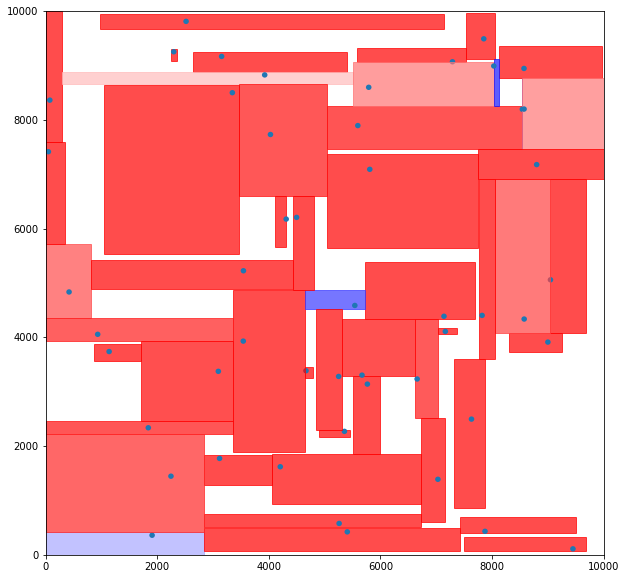

In [89]:
if __name__ == "__main__":
    main(n,xyr)
#     main()

In [82]:
def visualize(r, res, xyr):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes()
    
    base = patches.Rectangle(xy=(0,0), width=10000, height=10000, color='white')
    ax.add_patch(base)
    
    it = iter(xyr)
    for ri, abcd ,x,y,_ in zip(r, res, it,it,it):
        a,b,c,d = abcd
        xy = (a,b)
        wid = c-a
        hei = d-b
        si = wid*hei
        p = 1-(1-min(ri,si)/max(ri,si))**2
        
        
        box = patches.Rectangle(xy=xy, width=wid, height=hei,
                                color=plt.cm.bwr(p), alpha=0.7, label=int(p*100),
                                edgecolor='black')
        ax.add_patch(box)
        
        point = patches.Circle(xy = (x,y), radius=50)
        ax.add_patch(point)
        
        
        
    
    
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    
    plt.show()

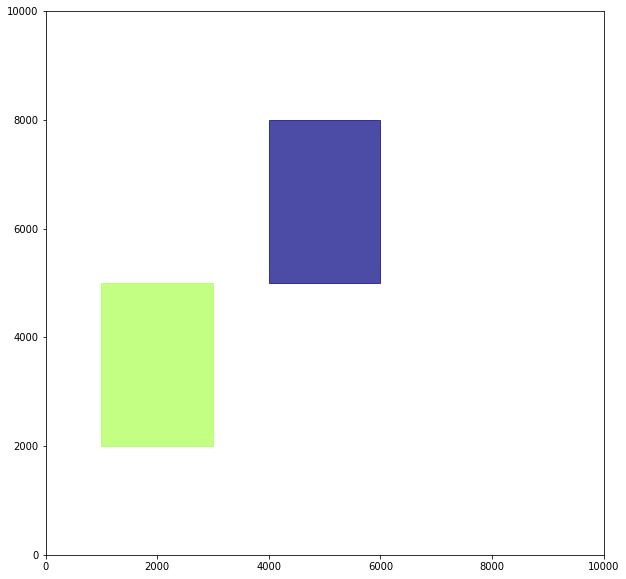

In [55]:
visualize([2000000,3], [[1000,2000,3000,4000],[4000,5000,6000,7000]])